# **USED CAR PRICE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Loading and Cleaning Data

In [ ]:
#loading the data from csv file to pandas dataframe
df = pd.read_excel('/content/drive/MyDrive/Mini-Project/car-dataset.xlsx')
df.head()

Car_Name    Year  Selling_Price  KMS_Driven Fuel_Type Seller_Type  \
0  Maruti Celerio  2016.0       675000.0     42000.0    Petrol  Individual   
1    Toyota Hilix  2003.0       900000.0     62000.0    Diesel  Individual   
2         Alto LX  2010.0       270000.0     95000.0    Petrol  Individual   
3          Santro  2008.0       300000.0     60000.0    Petrol  Individual   
4         Wagoner  2021.0       717000.0     80000.0    Petrol  Individual   

  Gear_Type        Owner  
0    Manual  First Owner  
1    Manual  First Owner  
2    Manual  First Owner  
3    Manual  First Owner  
4    Manual  First Owner

In [ ]:
#checking the number of rows and columns
df.shape

(4743, 8)

In [ ]:
#provides summary about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       4743 non-null   object 
 1   Year           4743 non-null   float64
 2   Selling_Price  4743 non-null   float64
 3   KMS_Driven     4743 non-null   float64
 4   Fuel_Type      4743 non-null   object 
 5   Seller_Type    4743 non-null   object 
 6   Gear_Type      4743 non-null   object 
 7   Owner          4743 non-null   object 
dtypes: float64(3), object(5)
memory usage: 296.6+ KB


In [ ]:
#converting the datatypes
df.Year = df.Year.astype('int64')
df.Selling_Price = df.Selling_Price.astype('int64')
df.KMS_Driven = df.KMS_Driven.astype('int64')
df.dtypes

Car_Name         object
Year              int64
Selling_Price     int64
KMS_Driven        int64
Fuel_Type        object
Seller_Type      object
Gear_Type        object
Owner            object
dtype: object

In [ ]:
#checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
KMS_Driven       0
Fuel_Type        0
Seller_Type      0
Gear_Type        0
Owner            0
dtype: int64

In [ ]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Gear_Type.value_counts()) 
print(df.Seller_Type.value_counts()) 
print(df.Owner.value_counts()) 

Petrol      2392
Diesel      2287
CNG           40
LPG           23
Electric       1
Name: Fuel_Type, dtype: int64
Manual       4170
Automatic     573
Name: Gear_Type, dtype: int64
Individual          3647
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64
First Owner             3193
Second Owner            1148
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64


In [ ]:
df.Gear_Type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.Year.unique()

array([2016, 2003, 2010, 2008, 2021, 2015, 2012, 2019, 2011, 2017, 2005,
       2009, 2018, 2000, 2022, 2020, 2014, 2013, 2006, 2004, 2002, 2007,
       1996, 1998, 1999, 2001, 1995, 1997, 1992])

In [ ]:
#dropping Car_Name and Seller_Type
#reindexing the columns and putting the dependent variable at the end
df1 = df.drop(['Car_Name', 'Seller_Type'],axis=1).reindex(['Year','Gear_Type', 'Fuel_Type', 'Owner', 'KMS_Driven', 'Selling_Price'],axis=1)
df1.head()

Year Gear_Type Fuel_Type        Owner  KMS_Driven  Selling_Price
0  2016    Manual    Petrol  First Owner       42000         675000
1  2003    Manual    Diesel  First Owner       62000         900000
2  2010    Manual    Petrol  First Owner       95000         270000
3  2008    Manual    Petrol  First Owner       60000         300000
4  2021    Manual    Petrol  First Owner       80000         717000

In [ ]:
df1.isnull().sum()

Year             0
Gear_Type        0
Fuel_Type        0
Owner            0
KMS_Driven       0
Selling_Price    0
dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Year vs Selling Price')

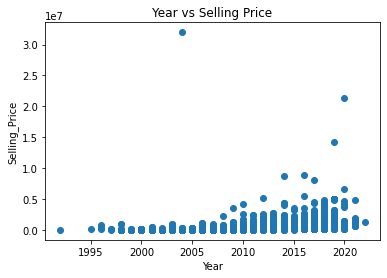

In [ ]:
plt.scatter(x=df["Year"], y=df["Selling_Price"])
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.title("Year vs Selling Price")

Text(0.5, 1.0, 'Kilometer Driven vs Selling Price')

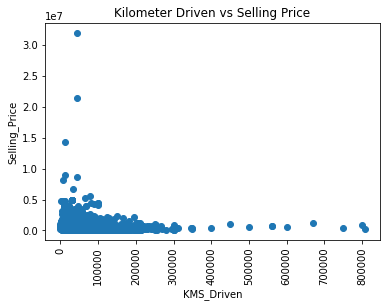

In [ ]:
plt.scatter(x=df["KMS_Driven"], y=df["Selling_Price"])
plt.xlabel("KMS_Driven")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.title("Kilometer Driven vs Selling Price")

Text(0.5, 1.0, 'Fuel Type vs Selling Price')

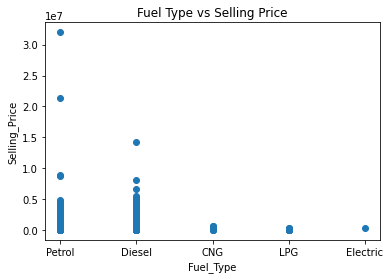

In [ ]:
plt.scatter(x=df["Fuel_Type"], y=df["Selling_Price"])
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.title("Fuel Type vs Selling Price")

Text(0.5, 1.0, 'Gear Type vs Selling Price')

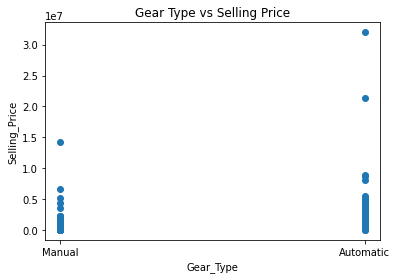

In [ ]:
plt.scatter(x=df["Gear_Type"], y=df["Selling_Price"])
plt.xlabel("Gear_Type")
plt.ylabel("Selling_Price")
plt.title("Gear Type vs Selling Price")

Text(0.5, 1.0, 'Seller Type vs Selling Price')

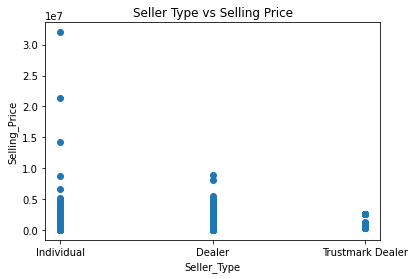

In [ ]:
plt.scatter(x=df["Seller_Type"], y=df["Selling_Price"])
plt.xlabel("Seller_Type")
plt.ylabel("Selling_Price")
plt.title("Seller Type vs Selling Price")

Text(0.5, 1.0, 'Owner vs Selling Price')

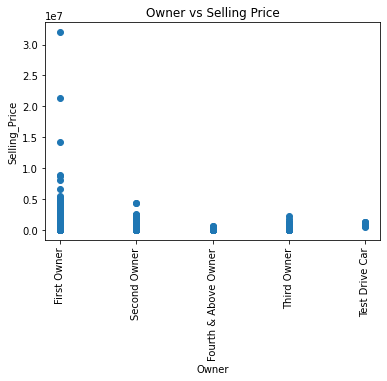

In [ ]:
plt.scatter(x=df["Owner"], y=df["Selling_Price"])
plt.xlabel("Owner")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.title("Owner vs Selling Price")

### Manual and Automatic Cars

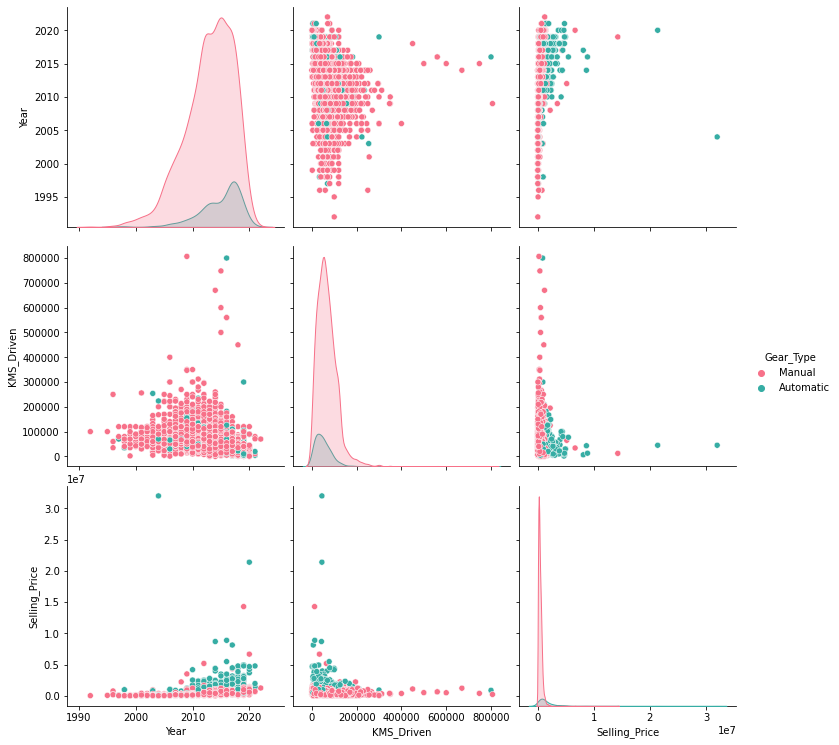

In [ ]:
sns.pairplot(df1,hue = 'Gear_Type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic cars have higher price compared to manual type cars.

### Fuel Types

In [ ]:
df1.Fuel_Type.value_counts()

Petrol      2392
Diesel      2287
CNG           40
LPG           23
Electric       1
Name: Fuel_Type, dtype: int64

Labelling other fuel types as Others since most of the data points are Petrol and Diesel.

In [ ]:
df2 = df1
df2.Fuel_Type = df2.Fuel_Type.map(lambda x: x if x in ['Diesel','Petrol'] else 'Others')
df2.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'Others'], dtype=object)

In [ ]:
manual = df2[df2['Gear_Type']=='Manual']
automatic = df2[df2['Gear_Type']=='Automatic']

Manual type car


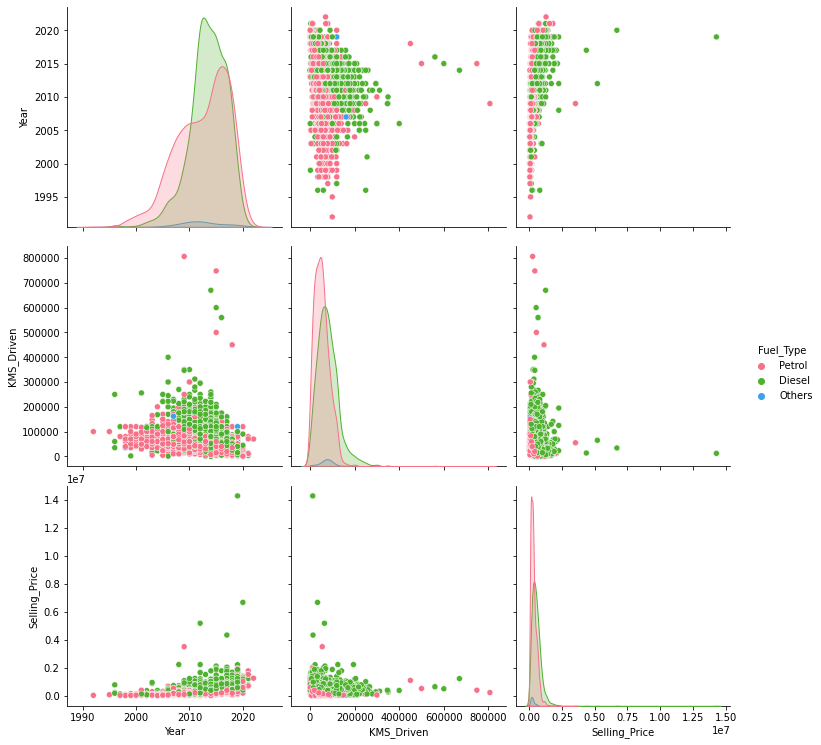

In [ ]:
print('Manual type car')
sns.pairplot(manual,hue = 'Fuel_Type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic type car


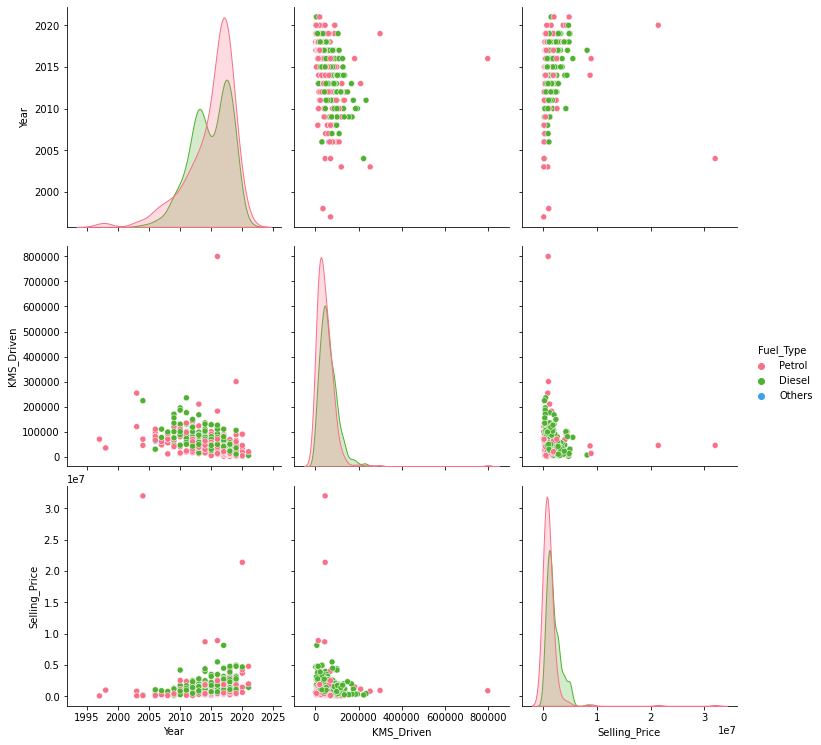

In [ ]:
print('Automatic type car')
sns.pairplot(automatic,hue = 'Fuel_Type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Selling price of diesel type cars in both manual and automatic is more spread than petrol and other fuel.

### Owner

In [ ]:
df2.groupby('Owner')[['KMS_Driven','Selling_Price']].agg(['count','mean']).applymap(lambda x: format(x,'.0f'))

KMS_Driven        Selling_Price        
                          count   mean         count    mean
Owner                                                       
First Owner                3193  56177          3193  652034
Fourth & Above Owner         81  99138            81  173901
Second Owner               1148  81447          1148  355503
Test Drive Car               17   4155            17  954294
Third Owner                 304  99305           304  269474

In [ ]:
#dropping test drive cars and merging third owner and forth & above owner as third owner and above
df3 = df2[~(df2['Owner']=='Test Drive Car')]
df3.Owner = df3.Owner.map(lambda x: x if x in ['First Owner','Second Owner'] else 'Third Owner & Above')

df3['Owner'].value_counts()

First Owner            3193
Second Owner           1148
Third Owner & Above     385
Name: Owner, dtype: int64

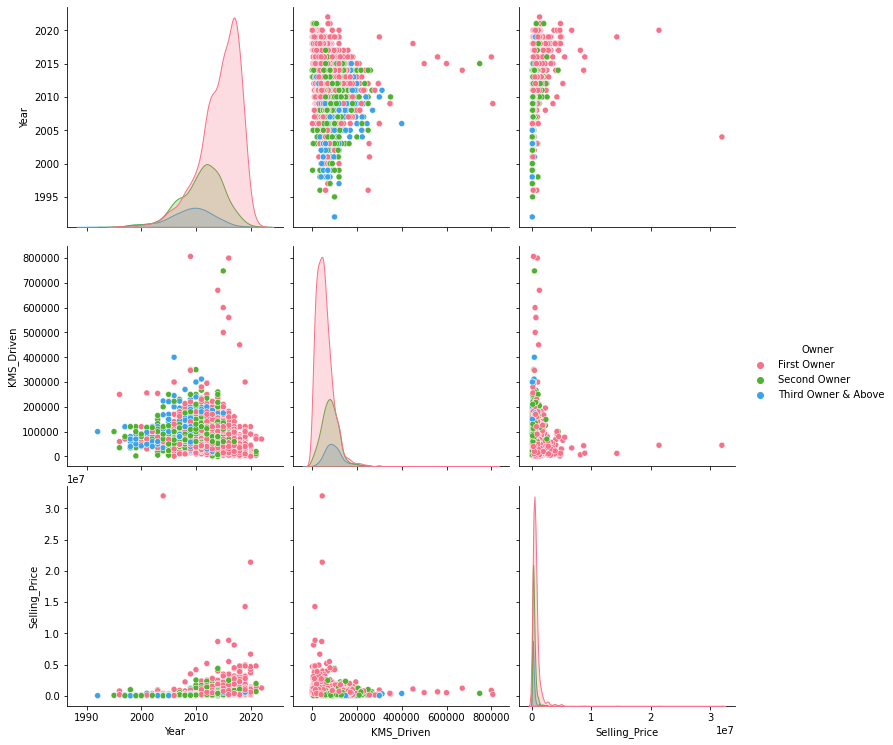

In [ ]:
sns.pairplot(df3,hue = 'Owner',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Cars sold by first owner have higher price than the rest.

# Outlier Detection and removing using IQR method

In [ ]:
df3.groupby('Gear_Type').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['Year'],axis=1)

KMS_Driven                      Selling_Price                  \
                mean    std   min     max          mean      std    min   
Gear_Type                                                                 
Automatic      52171  49869  1100  800000       1453576  1963962  79000   
Manual         67706  50213     1  806599        422394   396708  11384   

                     
                max  
Gear_Type            
Automatic  32000000  
Manual     14295679

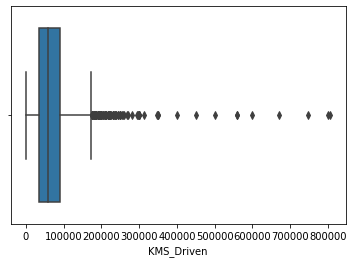

In [ ]:
sns.boxplot(x = df3['KMS_Driven'])
plt.show()

In [ ]:
#removing outliers in kms driven 
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    df_km_driven = df['KMS_Driven']

    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df4 = remove_outlier_km_driven(df3)

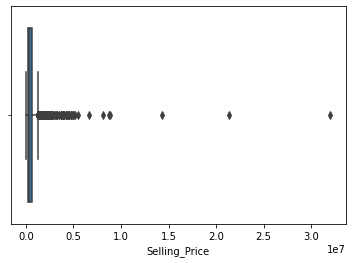

In [ ]:
sns.boxplot(x = df3['Selling_Price'])
plt.show()

In [ ]:
#removing outliers in selling price by gear type and year 
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.Year.unique()):
        year_price_manual = df[(df['Year']==year) & (df['Gear_Type']=='Manual')]['Selling_Price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['Year']==year) & (df['Gear_Type']=='Automatic')]['Selling_Price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df5 = remove_outlier_selling_price(df4)

In [ ]:
year_mean_manual = df5[df5['Gear_Type']=='Manual'].groupby('Year')['Selling_Price'].mean()
year_mean_automatic = df5[df5['Gear_Type']=='Automatic'].groupby('Year')['Selling_Price'].mean()

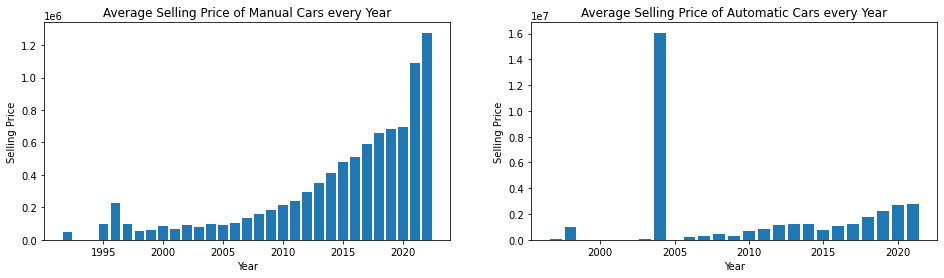

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [ ]:
#removing datapoints before 2005 since it produces inconsistency and the data points below 2000 have low value count
df6 = df5[df5['Year']>2005]

In [ ]:
year_mean_manual_price = df6[df6['Gear_Type']=='Manual'].groupby('Year')['Selling_Price'].mean()
year_mean_automatic_price = df6[df6['Gear_Type']=='Automatic'].groupby('Year')['Selling_Price'].mean()
year_mean_manual_km = df6[df6['Gear_Type']=='Manual'].groupby('Year')['KMS_Driven'].mean()
year_mean_automatic_km = df6[df6['Gear_Type']=='Automatic'].groupby('Year')['KMS_Driven'].mean()

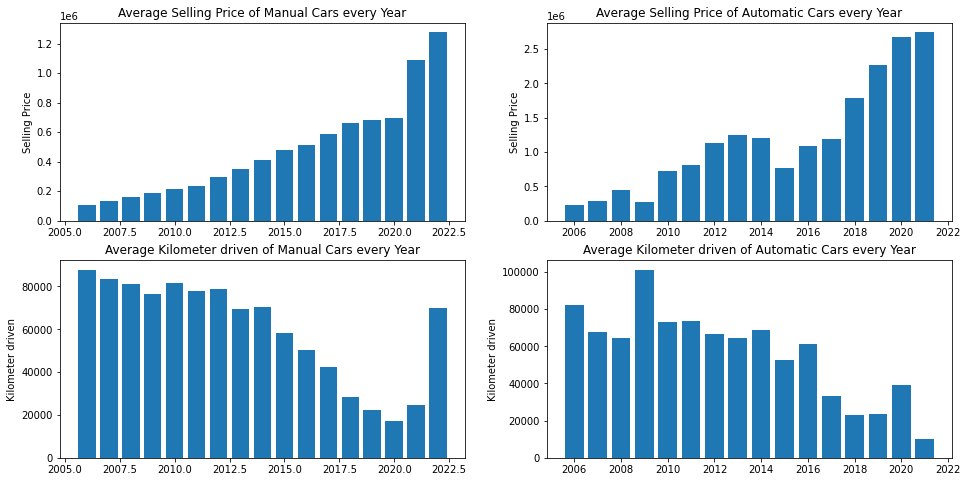

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year')
ax[0][0].set_ylabel('Selling Price')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year')
ax[0][1].set_ylabel('Selling Price')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year')
ax[1][0].set_ylabel('Kilometer driven')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year')
ax[1][1].set_ylabel('Kilometer driven')

plt.show()

# Removing suspicious datapoints

Since the average selling price of cars increases each year whereas average kilometer driven by the car should be atleast lower than the average kilometer driven last year, we will be removing manual and automatic cars which kilometer driven is greater than the average kilometer driven last year but having lower selling price compared to the average price last year.


In [ ]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    years = sorted(df.Year.unique())
    for i in range(1,len(years)):
        df_year = df[(df['Year']==years[i])&(df['Gear_Type']=='Manual')]
        last_mean_km_driven = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Manual')]['KMS_Driven'].mean()
        last_mean_selling_price = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Manual')]['Selling_Price'].mean() 
        df_outlier = df_year[(df_year['KMS_Driven']>last_mean_km_driven)&(df_year['Selling_Price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier])
        
        df_year = df[(df['Year']==years[i])&(df['Gear_Type']=='Automatic')]
        last_mean_km_driven = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Automatic')]['KMS_Driven'].mean()
        last_mean_selling_price = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Automatic')]['Selling_Price'].mean() 
        df_outlier = df_year[(df_year['KMS_Driven']>last_mean_km_driven)&(df_year['Selling_Price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier]) 
    return df.drop(temp.index)
    
df7 = remove_outlier_last_year(df6)

Removing inconsistencies in selling price based on number of previous owner. If the second owner offers lower selling price than the average selling price of third owner, those data points will be removed. The same removal procedure is also done with first and second owners based on year.

In [ ]:
def remove_outlier_owner(df):
    temp = pd.DataFrame()
    for a in sorted(df.Year.unique()):
        for b in ['Manual','Automatic']:
            df_year = df[(df['Year']==a)&(df['Gear_Type']==b)]
            second_mean = df_year[df_year['Owner']=='Second Owner']['Selling_Price'].mean()
            third_mean = df_year[df_year['Owner']=='Third Owner & Above']['Selling_Price'].mean()
            df_outlier = df_year[((df_year['Owner']=='Second Owner')&(df_year['Selling_Price']<third_mean)) | ((df_year['Owner']=='First Owner')&(df_year['Selling_Price']<second_mean))]
            temp = pd.concat([temp,df_outlier])
    return df.drop(temp.index)
    
df8 = remove_outlier_owner(df7)

Removing data points with low kilometers driven but also having low selling price and data points high kilometers driven and high selling price as well.

In [ ]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    for i in sorted(df.Year.unique()):
        df_year = df[df['Year']==i]
        km = df_year['KMS_Driven']
        price = df_year['Selling_Price']
        outlier = df_year[(df_year['KMS_Driven']<km.mean()-km.std())&(df_year['Selling_Price']<price.mean()-price.std()) | (df_year['KMS_Driven']>km.mean()+km.std())&(df_year['Selling_Price']>price.mean()+price.std())]
        temp = pd.concat([temp,outlier])

    return df.drop(temp.index)
    
df9 = remove_outlier_last_year(df8)

In [ ]:
df9.shape

(1954, 6)

# Encoding Data

In [ ]:
transmission = pd.get_dummies(df9['Gear_Type'])
fuel = pd.get_dummies(df9['Fuel_Type'])
owner = df9['Owner'].map(lambda x: 1 if x=='First Owner' else 2 if x=='Second Owner' else 3)

In [ ]:
X = pd.concat([transmission,fuel,owner,df9.drop(['Gear_Type','Fuel_Type','Owner','Selling_Price'],axis=1)],axis=1)
y = df9['Selling_Price']

In [ ]:
X.head()

Automatic  Manual  Diesel  Others  Petrol  Owner  Year  KMS_Driven
0          0       1       0       0       1      1  2016       42000
2          0       1       0       0       1      1  2010       95000
3          0       1       0       0       1      1  2008       60000
8          0       1       1       0       0      1  2016       38000
9          0       1       0       0       1      1  2015       83000

In [ ]:
y.head()

0    675000
2    270000
3    300000
8    670000
9    500000
Name: Selling_Price, dtype: int64

# Training Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10, shuffle=True)

### Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_model.score(X_train, y_train)

0.6481894903250482

In [ ]:
lr_model.score(X_test, y_test)

0.6607925781037972

### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.65119983, 0.6521669 , 0.67650951, 0.63889589, 0.67675972])

### Using GridSearchCV to find the best model

In [ ]:
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'n_estimators': range(1,50,5)
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score  \
0  linear_regression    0.659830   
1              lasso    0.659107   
2      decision_tree    0.817428   
3      random_forest    0.859769   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 2, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  
3           {'criterion': 'mse', 'n_estimators': 36}

Random Forest Algorithm is the best algorithm for this project since it has best score compared to other algorithms.

In [ ]:
model = RandomForestRegressor(n_estimators=36, criterion = 'mse')

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', n_estimators=36)

# Making Prediction

In [ ]:
def predict_price(transmission,fuel,previous_owner,year,km_driven):
    x = []
    x[:8] = np.zeros(8,dtype='int32')
    x[5] = previous_owner
    x[6] = year
    x[7] = km_driven
    
    transmission_index = np.where(X.columns==transmission)[0][0]
    fuel_index = np.where(X.columns==fuel)[0][0]
    
    if transmission_index>=0:
        x[transmission_index] = 1
    if fuel_index>=2:
        x[fuel_index] = 1
        
    return float(format(model.predict([x])[0],'.2f'))

In [ ]:
predict_price('Manual','Diesel',1,2013,10000)

560986.11

In [ ]:
predict_price('Automatic','Petrol',1,2014,50000)

1493062.22

In [ ]:
predict_price('Manual','Diesel',1,2018,20000)

966818.54

# THANK YOU!